<p align="center">
<img src="https://github.com/KelseyMcNeillie/datacampgettingstartedinsql/blob/master/images/regular.png?raw=true" width="50%">
</p>
<br><br>

# **Getting Started in SQL Live Training**

Welcome to the DataCamp "Getting Started in SQL Live Training", where we will be covering the basics of SQL queries through a hands on coding session. You will learn how to query, filter, and aggregate data to answer our real world business questions.

In today's notebook, you will learn:

* How to translate business questions into powerful SQL queries
* Use SELECT to return the exact data you need  
* Use WHERE to filter your returned data
* Create powerful aggregations to sort and analyze your data
* Organize your data using ORDER BY and LIMIT


In today's session, you will be taking on the role of a data analyst for a prestigious country club called **Pinebrook**.

The club has seen a significant increase in membership cancellations over the past few years. Management has asked us to create a report summarizing the membership profile to try and understand what's driving these cancellations.


# **The Dataset**

This data is taken from a .csv file called "membership_clean". As today's session will focus on creating queries, the data has already been cleaned for you. It contains the following columns.

`id:` unique identifier for a member

`last_name:` the member’s last name

`marital_status`: member’s marital status

`gender`: member’s reported gender

`annual_income`: how much the member makes a year

`industry`: the industry sector a member works in

`zip _code`: where the member lives

`age_at_issue`: how old the member was when they joined

`member_type`: which membership tier the member belongs to

`add_member`: number of additional members on the account

`annual_fee`: the cost of membership

`payment`: membership payment plan

`status`: active membership vs. cancellation

`start_month/start_day/start_year`: date joined

`end_month/end_day/end_year`: date ended (if applicable)




# **Setting Up PostgreSQL**

In [28]:
# This block of code will install PostgreSQL
%%capture
!wget -qO- https://www.postgresql.org/media/keys/ACCC4CF8.asc | gpg --dearmor | tee /usr/share/keyrings/postgresql-keyring.gpg > /dev/null
!echo "deb [signed-by=/usr/share/keyrings/postgresql-keyring.gpg] http://apt.postgresql.org/pub/repos/apt/ bionic-pgdg main" > /etc/apt/sources.list.d/pgdg.list
!apt -qq update
!apt -yq install postgresql postgresql-client
!service postgresql start
# make calling psql shorter
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
!psql postgres -c "CREATE DATABASE root"  # now just !psql -c "..."
# load SQL extensions
%load_ext sql
%config SqlMagic.feedback=False
%config SqlMagic.autopandas=True
%sql postgresql+psycopg2://root@localhost/postgres
!sudo -u postgres psql -c "ALTER USER postgres PASSWORD 'postgres';"
import os
os.environ["PGPASSWORD"] = "postgres"
%sql postgresql+psycopg2://postgres@localhost/mydb


In [29]:
# This will download your data to local environment
!wget -q https://raw.githubusercontent.com/datacamp/getting-started-in-sql-live-session/master/data/membership.csv

In [30]:
# This will create your table
%%sql
DROP TABLE IF EXISTS membership;
CREATE TABLE membership (
 id varchar(50) primary key,
 last_name varchar(50),
 marital_status varchar(50),
 gender varchar(50),
 annual_income INT,
 industry varchar(50),
 zip_code INT,
 age_at_issue INT,
 member_type varchar(50),
 add_members INT,
 annual_fee INT,
 payment VARCHAR(50),
 status VARCHAR(50),
 start_month INT,
 start_day INT,
 start_year INT,
 end_month INT,
 end_day INT,
 end_year INT
);
COPY membership
FROM '/content/membership.csv' DELIMITER ',' CSV HEADER;

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


""


# **Understanding the Membership - Part I**

The first step in exploring a new dataset is to view it in it's entirety. This lets you explore the columns and data types within.

Here are some important statements to remember when querying your dataset.


*   `SELECT`: returns either all columns using * or specific columns as specified, seperated by a comma. Example: `SELECT this_column, that_column`
*   `FROM` : specifies the table that the data should be returned from. Example: `FROM table`
* `ORDER BY`: returns the data sorted by column specified. Can be sorted in `ASC` (ascending) or `DESC` (descending). Example: `ORDER BY this_column ASC`
*`LIMIT`: limits the number of rows returned. Example: `LIMIT 10` will only return ten rows

### **Code Commenting**
There are two types of code commenting in Postgres

-- `Inline commenting` : Used for quick, short notes

"/*" `Multi line commenting` "*/" (use without quotation marks): Used for longer comments, such as metadata, or code headers including the author, date, purpose, etc.  


# **Exploring the Dataset**

In [31]:
%%sql

-- View the entire dataset

SELECT *
FROM membership

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,last_name,marital_status,gender,annual_income,industry,zip_code,age_at_issue,member_type,add_members,annual_fee,payment,status,start_month,start_day,start_year,end_month,end_day,end_year
0,A02601,Barrett,Married,M,115613,Consumer Discretionary,80202,28,Gold,3,9000,QUARTERLY,CANCELLED,12,31,2009,2.0,26.0,2012.0
1,A00128,Boyd,Married,M,102874,Consumer Staples,80202,43,Platinum,2,15000,ANNUAL,CANCELLED,12,31,2007,2.0,26.0,2010.0
2,A00102,Hudson,Married,M,87772,Utilities,80202,45,Silver,1,7000,ANNUAL,CANCELLED,12,31,2007,2.0,26.0,2009.0
3,A02479,Green,Single,M,81574,Consumer Staples,80202,26,Silver,0,7000,ANNUAL,CANCELLED,12,24,2009,2.0,21.0,2012.0
4,A02434,Parker,Married,F,90410,Real Estate,80202,62,Bronze,1,5000,SEMI-ANNUAL,CANCELLED,12,9,2009,2.0,7.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,A00068,Cruz,Single,M,54383,Materials,80237,25,Gold,0,9000,MONTHLY,CANCELLED,10,31,2007,5.0,17.0,2009.0
7271,A00062,Barton,Married,M,35071,Real Estate,80224,34,Bronze,1,5000,ANNUAL,CANCELLED,10,31,2007,4.0,11.0,2008.0
7272,A00007,Parks,Married,M,89766,Health Care,80222,39,Bronze,2,5000,ANNUAL,CANCELLED,2,21,2007,8.0,26.0,2007.0
7273,A00027,Dennis,Single,M,52826,Utilities,80224,22,Silver,0,7000,SEMI-ANNUAL,CANCELLED,7,18,2007,7.0,29.0,2009.0


After you have viewed the entire dataset, you may want to only view certain columns.

Use the `SELECT` function to isolate only the columns needed

In [32]:
%%sql

-- Show the membership demographic information

SELECT last_name, marital_status,gender, industry, zip_code
FROM membership

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,last_name,marital_status,gender,industry,zip_code
0,Barrett,Married,M,Consumer Discretionary,80202
1,Boyd,Married,M,Consumer Staples,80202
2,Hudson,Married,M,Utilities,80202
3,Green,Single,M,Consumer Staples,80202
4,Parker,Married,F,Real Estate,80202
...,...,...,...,...,...
7270,Cruz,Single,M,Materials,80237
7271,Barton,Married,M,Real Estate,80224
7272,Parks,Married,M,Health Care,80222
7273,Dennis,Single,M,Utilities,80224


In addition to reviewing specific columns, you may want to order and arrange the data in a simple way.

Use `ORDER BY` and `LIMIT` to organize and arrange data.

In [35]:
%%sql

-- Show the top and lowest earners in the dataset

SELECT last_name, annual_income
FROM membership
--ORDER BY annual_income DESC
ORDER BY annual_income DESC
LIMIT 10

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,last_name,annual_income
0,Duncan,119996
1,Porter,119986
2,Castillo,119983
3,Day,119979
4,Morris,119963
5,Cole,119948
6,Pittman,119938
7,Dean,119924
8,Glover,119916
9,Coleman,119915


In [37]:
%%sql

-- Show only the top oldest members by the age they joined at

SELECT last_name, age_at_issue
FROM membership
ORDER BY age_at_issue DESC
LIMIT 10

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,last_name,age_at_issue
0,Scott,78
1,Paul,78
2,Weaver,78
3,Rowe,78
4,Peters,77
5,Terry,77
6,Nelson,77
7,Castillo,77
8,Haynes,77
9,Hanson,77


# What Have We Learned About the Membership?

So far, we have discovered:


*   There are 7,275 members in the dataset
*   The top earners have an annual income of 119,996 dollars
*   The lowest earners have an annual income of 35,002 dollars
*   The oldest members are either 78 or 77 years old





# **Q&A**

# **Understanding the Membership - Part II**


## **Filtering on Rows**
After selecting the specific `COLUMNS` needed, it can also be necessary to filter on the `ROWS` of your database.

Here are some of the functions you can use to filter your data.

* `=` : Indicates when a column's row matches the criteria exactly  
* `>` and `<`: Indicates when a row value is higher or lower than the specified criteria
* `BETWEEN`: Indicate a range of values to filter on. Includes both of the values used.
* `AND`: Indicates that there are two filtering requirements that must be met
* `OR`: Indicates that the row must meet at least one of the specified criteria
* `IN`: Specifies multiple string values to filter on
* `LIKE`: Used as a boolean search when the exact term is unknown
*`ILIKE`: Similar to`LIKE`, but is case indifferent  

### Using ! and `NOT`
You can also filter rows based on what they do NOT include using the following:

*   `=!` : Indicates that the returned rows should NOT equal 'X'
*  `NOT`: Used with `LIKE` and `ILIKE` to indicate the returned rows should include everything BUT those values





## **Filtering Using** `=`, `>`, `<`, `AND`, `OR`, **and** `BETWEEN`





Filter using `=`

In [38]:
%%sql

-- Find only members who have cancelled their membership

SELECT *
FROM membership
WHERE status = 'CANCELLED'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,last_name,marital_status,gender,annual_income,industry,zip_code,age_at_issue,member_type,add_members,annual_fee,payment,status,start_month,start_day,start_year,end_month,end_day,end_year
0,A02601,Barrett,Married,M,115613,Consumer Discretionary,80202,28,Gold,3,9000,QUARTERLY,CANCELLED,12,31,2009,2,26,2012
1,A00128,Boyd,Married,M,102874,Consumer Staples,80202,43,Platinum,2,15000,ANNUAL,CANCELLED,12,31,2007,2,26,2010
2,A00102,Hudson,Married,M,87772,Utilities,80202,45,Silver,1,7000,ANNUAL,CANCELLED,12,31,2007,2,26,2009
3,A02479,Green,Single,M,81574,Consumer Staples,80202,26,Silver,0,7000,ANNUAL,CANCELLED,12,24,2009,2,21,2012
4,A02434,Parker,Married,F,90410,Real Estate,80202,62,Bronze,1,5000,SEMI-ANNUAL,CANCELLED,12,9,2009,2,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,A00068,Cruz,Single,M,54383,Materials,80237,25,Gold,0,9000,MONTHLY,CANCELLED,10,31,2007,5,17,2009
2806,A00062,Barton,Married,M,35071,Real Estate,80224,34,Bronze,1,5000,ANNUAL,CANCELLED,10,31,2007,4,11,2008
2807,A00007,Parks,Married,M,89766,Health Care,80222,39,Bronze,2,5000,ANNUAL,CANCELLED,2,21,2007,8,26,2007
2808,A00027,Dennis,Single,M,52826,Utilities,80224,22,Silver,0,7000,SEMI-ANNUAL,CANCELLED,7,18,2007,7,29,2009


In [44]:
%%sql
SELECT COUNT(*)
FROM membership
WHERE status = 'CANCELLED'  -- Filter before aggregation


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,count
0,2810


Filter using `>`

In [45]:
%%sql

-- Find members who earn more than $50,000 a year

SELECT id, annual_income
FROM membership
WHERE annual_income > 50000

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,annual_income
0,A02601,115613
1,A00128,102874
2,A00102,87772
3,A02479,81574
4,A02434,90410
...,...,...
5956,A00669,58636
5957,A00068,54383
5958,A00007,89766
5959,A00027,52826


Filter using `<=`

In [46]:
%%sql

-- Find members age 40 or younger

SELECT id, age_at_issue
FROM membership
WHERE age_at_issue <= 40

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,age_at_issue
0,A02601,28
1,A02479,26
2,A01133,36
3,A04898,35
4,A06081,22
...,...,...
3103,A00669,35
3104,A00068,25
3105,A00062,34
3106,A00007,39


Filter using `BETWEEN`

In [47]:
%%sql

-- Find members who joined between 2009 and 2011

SELECT id, start_year
FROM membership
WHERE start_year BETWEEN '2009' and '2011'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,start_year
0,A02601,2009
1,A02479,2009
2,A02434,2009
3,A02148,2009
4,A04898,2010
...,...,...
3885,A02062,2009
3886,A02098,2009
3887,A04728,2010
3888,A02149,2009


Filter using `>`, `AND`

In [48]:
%%sql

-- Find members who both earn above $75,000 a year, and have a Gold Membership

SELECT id, annual_income, member_type
FROM membership
WHERE annual_income > 75000
  AND member_type = 'Gold'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,annual_income,member_type
0,A02601,115613,Gold
1,A00936,115486,Gold
2,A01942,103415,Gold
3,A07225,119512,Gold
4,A03918,85926,Gold
...,...,...,...
936,A01054,83608,Gold
937,A00235,87823,Gold
938,A00265,93378,Gold
939,A00499,103219,Gold


Filter Using `>`, `OR`

In [49]:
%%sql

-- Find members who either earn over $80,000 a year, or who have a Silver Membership

SELECT id, annual_income, member_type
FROM membership
WHERE annual_income > 80000
  OR member_type = 'Silver'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,annual_income,member_type
0,A02601,115613,Gold
1,A00128,102874,Platinum
2,A00102,87772,Silver
3,A02479,81574,Silver
4,A02434,90410,Bronze
...,...,...,...
4358,A00791,71877,Silver
4359,A00788,116849,Bronze
4360,A00007,89766,Bronze
4361,A00027,52826,Silver


Filter using `IN()`

In [50]:
%%sql

-- Find members who live in the zip codes 80202, 80210, and 80206

SELECT id, zip_code
FROM membership
WHERE zip_code IN(80202, 80210, 80206)

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,zip_code
0,A02601,80202
1,A00128,80202
2,A00102,80202
3,A02479,80202
4,A02434,80202
...,...,...
829,A01218,80210
830,A06294,80210
831,A05235,80210
832,A07890,80210


Filter using `IN`, `AND`, `OR` using logical order

In [52]:
%%sql

-- Identify the Gold members who are either single or divorced, or who work in Health Care

SELECT *
FROM membership
WHERE (member_type = 'Gold' AND marital_status IN ('Single, Divorced'))
  OR industry = 'Health Care'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,last_name,marital_status,gender,annual_income,industry,zip_code,age_at_issue,member_type,add_members,annual_fee,payment,status,start_month,start_day,start_year,end_month,end_day,end_year
0,A04898,Gonzalez,Married,M,111065,Health Care,80202,35,Platinum,1,15000,ANNUAL,CANCELLED,10,11,2010,11.0,8.0,2012.0
1,A00936,Brock,Single,M,115486,Health Care,80202,25,Gold,0,9000,MONTHLY,CANCELLED,11,5,2008,3.0,6.0,2009.0
2,A02151,Maxwell,Single,M,64316,Health Care,80202,28,Gold,0,9000,MONTHLY,CANCELLED,9,30,2009,1.0,27.0,2010.0
3,A01956,Blair,Married,M,94495,Health Care,80202,37,Platinum,1,15000,ANNUAL,CANCELLED,9,7,2009,11.0,6.0,2010.0
4,A02550,Howard,Married,M,109236,Health Care,80203,41,Platinum,3,15000,QUARTERLY,CANCELLED,12,31,2009,8.0,27.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,A01488,Fitzgerald,Widowed,F,115299,Health Care,80231,63,Platinum,0,15000,ANNUAL,CANCELLED,3,30,2009,11.0,13.0,2010.0
576,A01431,Alvarado,Married,F,55219,Health Care,80237,49,Platinum,3,15000,SEMI-ANNUAL,CANCELLED,3,30,2009,9.0,14.0,2009.0
577,A01556,Estrada,Single,M,64480,Health Care,80237,24,Bronze,0,5000,SEMI-ANNUAL,CANCELLED,3,31,2009,9.0,21.0,2010.0
578,A01663,Jones,Married,F,66871,Health Care,80224,47,Silver,2,7000,ANNUAL,CANCELLED,4,29,2009,6.0,13.0,2010.0


## **Filtering with** `LIKE` **and** `ILIKE`

There are several situations where you may need to use `LIKE` or `ILIKE`.



*   When the criteria to be filtered on is only partially known
*   When the criteria to be filtered on needs to capture a range of values, but too many to use an `IN` function

*Remember:* `LIKE` *is case sensitive,* `ILIKE` *is not. For this reason, it is common in Postgres to simply use*`ILIKE`when filtering.



 Filter using `LIKE` and `NOT LIKE`

In [ ]:
%%sql
-- Find members who have last names starting with the letter 'A'

SELECT id, last_name
FROM membership
WHERE last_name LIKE 'A%'
LIMIT 10

In [54]:
%%sql
-- Find members who have last names that do NOT start with the letter 'B'

SELECT id, last_name
FROM membership
WHERE last_name NOT LIKE 'B%'
ORDER BY 2 ASC


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,last_name
0,A05139,Abbott
1,A10129,Abbott
2,A04133,Abbott
3,A06639,Abbott
4,A05592,Abbott
...,...,...
6572,A02865,Zimmerman
6573,A00273,Zimmerman
6574,A00870,Zimmerman
6575,A00306,Zimmerman


In [ ]:
%%sql
-- Find members who have last names that do NOT start with the letter 'B'

SELECT id, last_name
FROM membership
WHERE last_name NOT LIKE 'B%'
ORDER BY 2 ASC

Filter using `ILIKE` and ` NOT ILIKE`

In [58]:
%%sql

-- Find members who make annual or semi-annual membership payments

SELECT id, payment
FROM membership
WHERE payment ILIKE '%nnual'


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,payment
0,A00128,ANNUAL
1,A00102,ANNUAL
2,A02479,ANNUAL
3,A02434,SEMI-ANNUAL
4,A01133,ANNUAL
...,...,...
5523,A00669,ANNUAL
5524,A00062,ANNUAL
5525,A00007,ANNUAL
5526,A00027,SEMI-ANNUAL


In [59]:
%%sql

-- Find members who do NOT work in real estate

SELECT id, industry
FROM membership
WHERE industry NOT ILIKE 'real %'


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,id,industry
0,A02601,Consumer Discretionary
1,A00128,Consumer Staples
2,A00102,Utilities
3,A02479,Consumer Staples
4,A01133,Energy
...,...,...
6626,A00669,Consumer Discretionary
6627,A00068,Materials
6628,A00007,Health Care
6629,A00027,Utilities


# **What Have We Learned About the Membership?**


*   2,810 people have cancelled their memberships (39%)
*   5,961 earn over 50,000 a year (82%)
*   3,108 are age 40 or below (43%)
*   3,890 joined between 2009 and 2011 (53%)








# **Q&A**

# **Understanding the Membership - Part III**

In addition to returning columns and filtering on rows, SQL can be used to create aggregations of data, similar to a certain functions in Excel.

## **Aggregating Data**

Here are some of the functions used to aggregate data in SQL across only one column.  

* `SUM`: Is used to add up all the numerical values in a column
* `COUNT`: Is used to count all values in a column, string or numerical
* `AVG`: Is used to add up all the numerical values in a column and then divides by the total number of values
* `MIN`: Finds the smallest numerical value in a column
* `MAX`: Find the largest numerical value in a column



### **Aliases**

Sometimes it is useful in SQL to rename a column - this is called giving it an 'alias'. The syntax is simple, but remember - column names cannot have spaces, so you must use an underscore to seperate words.


Example:
```
SELECT avg(annual_income) AS Avg_income

FROM membership
```
Aliases are used to create cleaner outputs, and are useful in more complex SQL queries, such as when joining tables.


Aggregate using `SUM()`

In [60]:
%%sql

-- Find the sum of all annual fees for members who have cancelled

SELECT sum(annual_fee) AS Sum_fee
FROM membership
WHERE status = 'CANCELLED'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,sum_fee
0,25162000


Aggregate using `COUNT()`

In [64]:
%%sql

-- Find how many male members have cancelled their memberships

SELECT count(id) AS member_count
FROM membership
WHERE gender = 'F'
  AND status ILIKE 'C%'


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,member_count
0,615


Aggregate using `AVG()`

In [66]:
%%sql

-- Find the average annual income of cancelled members

SELECT round(avg(annual_income),2) AS avg_income
FROM membership
WHERE status = 'CANCELLED'

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,avg_income
0,77844.59


Aggregate using `MIN()`

In [67]:
%%sql

-- Find the youngest member

SELECT min(age_at_issue)
FROM membership

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,min
0,18


Aggregate using `MAX()`

In [69]:
%%sql

-- Find the most additional members a member can have

SELECT max(add_members)
FROM membership

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,max
0,3


## **Aggregation in SQL with** `GROUP BY`

Similar to creating a pivot table in Excel, you can aggregate numerical values by a categorical variable. You can do this in SQL by using the `GROUP BY` statement.

The `GROUP BY` statement must include the categorical column that the data will be aggregated by. It must be written after a `WHERE` statement.


Example:
```
SELECT this_column, sum(that_column)
FROM table
WHERE other_column = 'value'
GROUP BY this_column
```

Remember: The column being used to aggregate in the `GROUP BY` statement must also appear in the `SELECT` statement

### **Aggregate Data with** `GROUP BY`

In [70]:
%%sql

-- Find the marital status with the most total members

SELECT marital_status, count(id) AS member_count
FROM membership
GROUP BY marital_status
ORDER BY member_count DESC


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,marital_status,member_count
0,Married,5996
1,Single,1117
2,Widowed,117
3,Divorced,45


In [73]:
%%sql

-- Find the membership type with the fewest cancellations, and what their average annual income is

SELECT member_type, count(id) AS member_count, round(avg(annual_income),2) AS avg_income
FROM membership
WHERE status = 'CANCELLED'
GROUP BY member_type
ORDER BY member_count ASC


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,member_type,member_count,avg_income
0,Platinum,683,78967.04
1,Silver,695,78823.33
2,Bronze,709,76522.27
3,Gold,723,77140.13


In [75]:
%%sql

-- Find the average income, the sum of annual fees, and the count of members across industries for cancelled members

SELECT industry,
  round(avg(annual_income),2) AS avg_income,
  sum(annual_fee) AS sum_fee,
  count(id) AS member_count
FROM membership
WHERE status ILIKE 'C%'
GROUP BY industry


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,industry,avg_income,sum_fee,member_count
0,Telecommunication Services,76225.91,2083000,223
1,Health Care,81876.12,1956000,216
2,Information Technology,76264.44,2112000,238
3,Financials,77872.95,1908000,220
4,Real Estate,76755.62,2330000,272
5,Consumer Staples,77015.80,2018000,226
6,Unclassified,77303.78,1854000,204
7,Industrials,77040.30,2153000,241
8,Materials,76749.98,2035000,225
9,Energy,78864.16,2142000,232


## **Filtering on aggregated data with** `HAVING`

In order to filter on aggregated data, you will need to use the `HAVING` statement. This goes after the GROUP BY statement.

Example:

```
SELECT this_column, sum(that_column)
FROM table
GROUP BY this_column
HAVING sum(that_column) > 'value'
```


Aggregate on Previously Aggregated Data with `HAVING`

In [76]:
%%sql

-- How many Bronze members started by year, in years where more than 150 members joined?

SELECT member_type, start_year, count(ID)
FROM membership
GROUP BY member_type, start_year
HAVING count(id)> 150
ORDER BY member_type, start_year
LIMIT 5

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,member_type,start_year,count
0,Bronze,2008,226
1,Bronze,2009,308
2,Bronze,2010,514
3,Bronze,2012,246
4,Bronze,2013,343


In [82]:
%%sql

--What is the total of annual fees for people who have held membership for longer than a year, by start month,
--for months where more than $100,000 in fees was collected? Which month is the most profitable?


SELECT start_month, sum(annual_fee)
FROM membership
WHERE (end_year - start_year) > 1
GROUP BY start_month
HAVING sum(annual_fee) > 100000
ORDER BY start_month DESC

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,start_month,sum
0,12,1441000
1,11,652000
2,10,290000
3,9,310000
4,8,526000
5,7,449000
6,6,234000
7,5,198000
8,4,139000
9,3,803000


In [84]:
%%sql

-- What is the average annual income of members who earn more than $50,000 who left after 2012 by marital status?

SELECT marital_status, round(avg(annual_income),2)
FROM membership
WHERE end_year > 2011
GROUP BY marital_status
HAVING avg(annual_income) > 50000

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,marital_status,round
0,Widowed,79045.65
1,Married,78473.35
2,Divorced,69281.50
3,Single,76106.85


# What Have We Learned So Far?


*   Cancelled membership fees amount to a total loss of 25,162,000 dollars
*   2,195 men have cancelled their memberships (78% of all cancelled memberships - but men also make up 76% of the total membership)

*   82% of members are married, 15% are single, 2% are widowed, and 0.6% are divorced
*   Platinum members cancel at the least, with Gold Members cancellng the most. However, the difference between the cancellation numbers is not high, and all membership types have approximately the same level of average income.

*   The average income, fees, and member counts are fairly evenly distributed across all industries













# **Q&A**

# **What Is Driving Cancellations?**

It's time to use aggregations to explore the data and find out why cancellation rates are increasing.

We will introduce two more functions: `ROUND` and `DISTINCT`


*   `ROUND`: Used to round a value to the specified number of decimals. `ROUND` is used in the `SELECT` statement and is wrapped around calculations.

  Example:
```
  SELECT ROUND(AVG(annual_income), 2)
  FROM membership
```
  Will return the value: 77366.51


*   `DISTINCT`: Used to indicate that only unique values should be returned, and duplicates eliminated. Used in the `SELECT` statement.

Example:
```
SELECT DISTINCT member_type
FROM membership
```
Will return: Bronze, Silver, Gold, Platinum



ROUND and DISTINCT Practice

In [85]:
%%sql

-- Practice using the ROUND function to find the average annual income to two decimal places

SELECT member_type, round(avg(annual_income),2)
FROM membership
GROUP BY member_type

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,member_type,round
0,Bronze,77014.58
1,Silver,78051.80
2,Platinum,77255.93
3,Gold,77141.85


In [86]:
%%sql

-- Practice using the DISTINCT function to find the count of id by zip_code

SELECT distinct zip_code, count(id)
FROM membership
GROUP BY zip_code

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,zip_code,count
0,80202,274
1,80203,321
2,80204,265
3,80205,285
4,80206,282
5,80207,302
6,80209,293
7,80210,278
8,80211,288
9,80212,288


## **Finding Answers**

So far, we have determined that cancellation rates do not seem to be affected by annual income, gender, industry, or membership types.

What are some of the other various factors that could affect the rise of cancellations?

*   Marital Status and children
*   Age at issue
*   Geographic location

Let's look at each of these through the lens of a potential business question.



Does being unmarried with children affect cancellation rates?

In [87]:
%%sql


SELECT member_type, status, count(id)
FROM membership
WHERE marital_status NOT ILIKE 'M%'
GROUP BY member_type, status
HAVING count(add_members) >= 1
ORDER BY status

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,member_type,status,count
0,Silver,ACTIVE,191
1,Bronze,ACTIVE,195
2,Platinum,ACTIVE,175
3,Gold,ACTIVE,176
4,Gold,CANCELLED,149
5,Silver,CANCELLED,137
6,Platinum,CANCELLED,119
7,Bronze,CANCELLED,137


Does age at joining affect cancellations?

In [88]:
%%sql

SELECT status, round(avg(age_at_issue),2)
FROM membership
GROUP BY status


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,status,round
0,CANCELLED,41.69
1,ACTIVE,43.98


Does industry affect cancellations, controlling for people who earn over $50,000?

In [89]:
%%sql

SELECT industry, count(id)
FROM membership
WHERE status = 'CANCELLED'
GROUP BY industry
HAVING avg(annual_income) >= 50000
ORDER BY count(id) DESC

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,industry,count
0,Consumer Discretionary,275
1,Real Estate,272
2,Industrials,241
3,Utilities,238
4,Information Technology,238
5,Energy,232
6,Consumer Staples,226
7,Materials,225
8,Telecommunication Services,223
9,Financials,220


Is there any correlation between zip code and cancellations?

In [90]:
%%sql

SELECT distinct zip_code, count(id)
FROM membership
WHERE status ='CANCELLED'
GROUP BY 1
ORDER BY 2 DESC

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,zip_code,count
0,80237,238
1,80231,215
2,80224,209
3,80222,194
4,80205,107
5,80223,106
6,80236,106
7,80206,102
8,80211,102
9,80207,101


Create a report

In [92]:
%%sql

-- Compare the cancellation counts by zip code against other possible factors

SELECT zip_code,
  count(id) AS member_count,
  round(avg(annual_fee),2) AS avg_fee,
  round(avg(annual_income),2) AS avg_income,
  round(avg(add_members),2) AS avg_additional
FROM membership
WHERE status = 'CANCELLED'
GROUP BY zip_code
ORDER BY 2 DESC


   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


,zip_code,member_count,avg_fee,avg_income,avg_additional
0,80237,238,9243.70,78322.36,1.57
1,80231,215,9018.60,78066.48,1.64
2,80224,209,8933.01,76565.74,1.62
3,80222,194,8938.14,78499.70,1.70
4,80205,107,9299.07,78774.38,1.48
5,80223,106,8849.06,75499.10,1.67
6,80236,106,8471.70,76977.36,1.70
7,80211,102,9490.20,74069.75,1.66
8,80206,102,9235.29,77374.34,1.61
9,80207,101,9000.00,80548.73,1.70


# **Additional Research**

Sometimes, data analysis requires additional research!

Here we can see that the zip codes with the highest cancellation numbers are clustered close together.


<p align="left">
<img src="https://github.com/KelseyMcNeillie/datacampgettingstartedinsql/blob/master/images/zipmap.png?raw=true" width="50%">
</p>
<br><br>







# **Q&A**

# **Recap and Closing**

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
result =%sql SELECT marital_status, COUNT(*) AS member_count FROM membership GROUP BY marital_status

   postgresql+psycopg2://@/postgres
 * postgresql+psycopg2://postgres@localhost/postgres


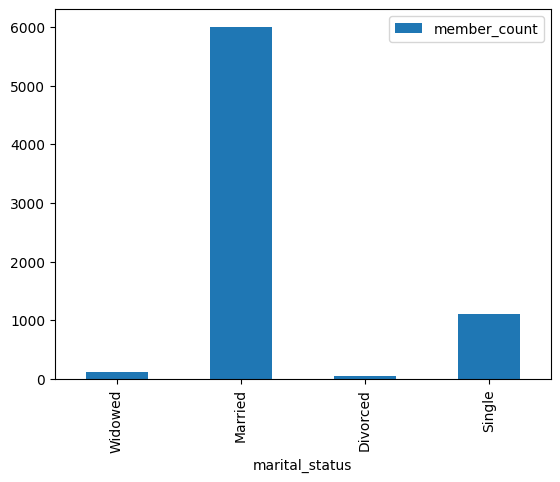

In [98]:
df = pd.DataFrame(result)
df.plot(x='marital_status', y='member_count', kind='bar')
plt.show()

In [143]:
# prompt: lets build a machine learning model with LogisticRegression which predict whether a member likely to cancel

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the data
# Assuming you have already executed the SQL queries and stored the data in a CSV (or other suitable format)
df = pd.read_csv('membership.csv')  # replace with your data file
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7275 entries, 0 to 7274
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7275 non-null   object 
 1   last_name       7275 non-null   object 
 2   marital_status  7275 non-null   object 
 3   gender          7275 non-null   object 
 4   annual_income   7275 non-null   int64  
 5    industry       7275 non-null   object 
 6   zip_code        7275 non-null   int64  
 7   age_at_issue    7275 non-null   int64  
 8   member_type     7275 non-null   object 
 9   add_members     7275 non-null   int64  
 10  annual_fee      7275 non-null   int64  
 11  payment_type    7275 non-null   object 
 12  status          7275 non-null   object 
 13  start_month     7275 non-null   int64  
 14  start_day       7275 non-null   int64  
 15  start_year      7275 non-null   int64  
 16  end_month       2810 non-null   float64
 17  end_day         2810 non-null   f

In [144]:
df.head()

,id,last_name,marital_status,gender,annual_income,industry,zip_code,age_at_issue,member_type,add_members,annual_fee,payment_type,status,start_month,start_day,start_year,end_month,end_day,end_year
0,A02601,Barrett,Married,M,115613,Consumer Discretionary,80202,28,Gold,3,9000,QUARTERLY,CANCELLED,12,31,2009,2.0,26.0,2012.0
1,A00128,Boyd,Married,M,102874,Consumer Staples,80202,43,Platinum,2,15000,ANNUAL,CANCELLED,12,31,2007,2.0,26.0,2010.0
2,A00102,Hudson,Married,M,87772,Utilities,80202,45,Silver,1,7000,ANNUAL,CANCELLED,12,31,2007,2.0,26.0,2009.0
3,A02479,Green,Single,M,81574,Consumer Staples,80202,26,Silver,0,7000,ANNUAL,CANCELLED,12,24,2009,2.0,21.0,2012.0
4,A02434,Parker,Married,F,90410,Real Estate,80202,62,Bronze,1,5000,SEMI-ANNUAL,CANCELLED,12,9,2009,2.0,7.0,2012.0


In [116]:
df.drop(columns=['id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7275 entries, 0 to 7274
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   last_name       7275 non-null   object 
 1   marital_status  7275 non-null   object 
 2   gender          7275 non-null   object 
 3   annual_income   7275 non-null   int64  
 4    industry       7275 non-null   object 
 5   zip_code        7275 non-null   int64  
 6   age_at_issue    7275 non-null   int64  
 7   member_type     7275 non-null   object 
 8   add_members     7275 non-null   int64  
 9   annual_fee      7275 non-null   int64  
 10  payment_type    7275 non-null   object 
 11  status          7275 non-null   object 
 12  start_month     7275 non-null   int64  
 13  start_day       7275 non-null   int64  
 14  start_year      7275 non-null   int64  
 15  end_month       2810 non-null   float64
 16  end_day         2810 non-null   float64
 17  end_year        2810 non-null   f

In [140]:
for col in df.columns[df.dtypes == "object"]:
    if df[col].notna().sum() > 0:  # Ensure column has valid values
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue="status")
        plt.xticks(rotation=45)
        plt.show()


In [145]:
df

,id,last_name,marital_status,gender,annual_income,industry,zip_code,age_at_issue,member_type,add_members,annual_fee,payment_type,status,start_month,start_day,start_year,end_month,end_day,end_year
0,A02601,Barrett,Married,M,115613,Consumer Discretionary,80202,28,Gold,3,9000,QUARTERLY,CANCELLED,12,31,2009,2.0,26.0,2012.0
1,A00128,Boyd,Married,M,102874,Consumer Staples,80202,43,Platinum,2,15000,ANNUAL,CANCELLED,12,31,2007,2.0,26.0,2010.0
2,A00102,Hudson,Married,M,87772,Utilities,80202,45,Silver,1,7000,ANNUAL,CANCELLED,12,31,2007,2.0,26.0,2009.0
3,A02479,Green,Single,M,81574,Consumer Staples,80202,26,Silver,0,7000,ANNUAL,CANCELLED,12,24,2009,2.0,21.0,2012.0
4,A02434,Parker,Married,F,90410,Real Estate,80202,62,Bronze,1,5000,SEMI-ANNUAL,CANCELLED,12,9,2009,2.0,7.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,A00068,Cruz,Single,M,54383,Materials,80237,25,Gold,0,9000,MONTHLY,CANCELLED,10,31,2007,5.0,17.0,2009.0
7271,A00062,Barton,Married,M,35071,Real Estate,80224,34,Bronze,1,5000,ANNUAL,CANCELLED,10,31,2007,4.0,11.0,2008.0
7272,A00007,Parks,Married,M,89766,Health Care,80222,39,Bronze,2,5000,ANNUAL,CANCELLED,2,21,2007,8.0,26.0,2007.0
7273,A00027,Dennis,Single,M,52826,Utilities,80224,22,Silver,0,7000,SEMI-ANNUAL,CANCELLED,7,18,2007,7.0,29.0,2009.0


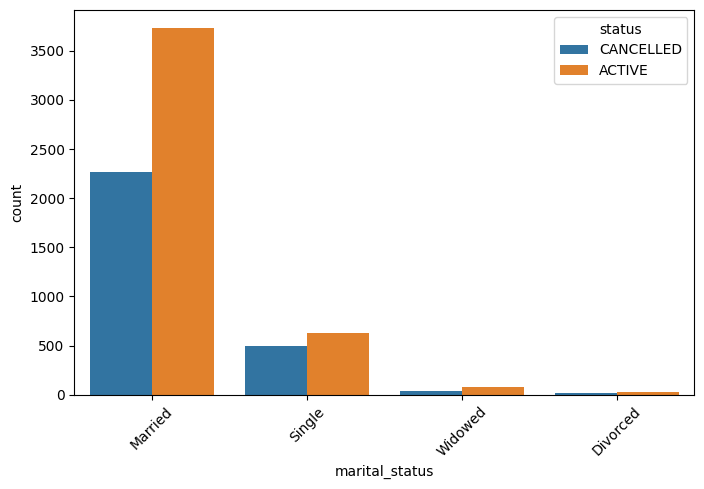

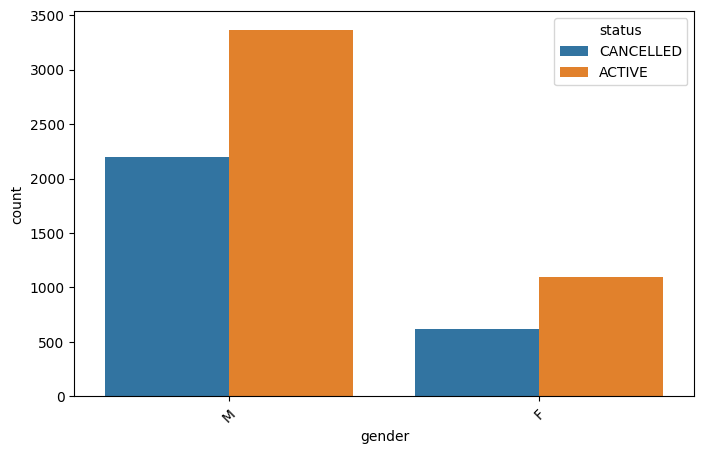

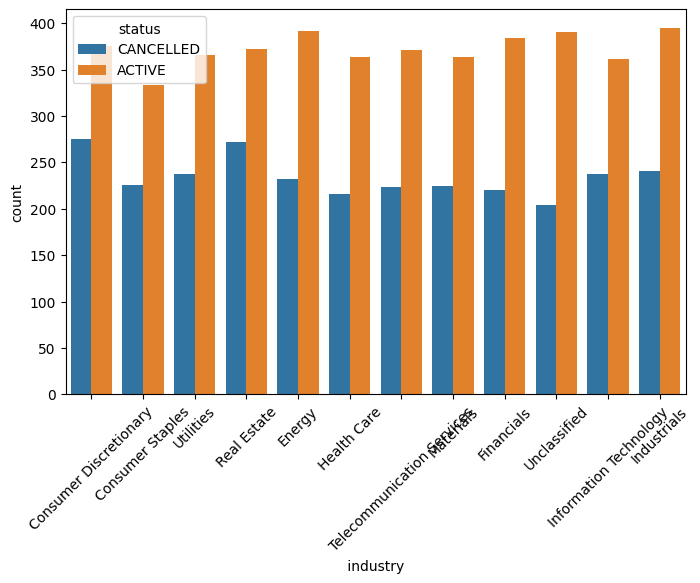

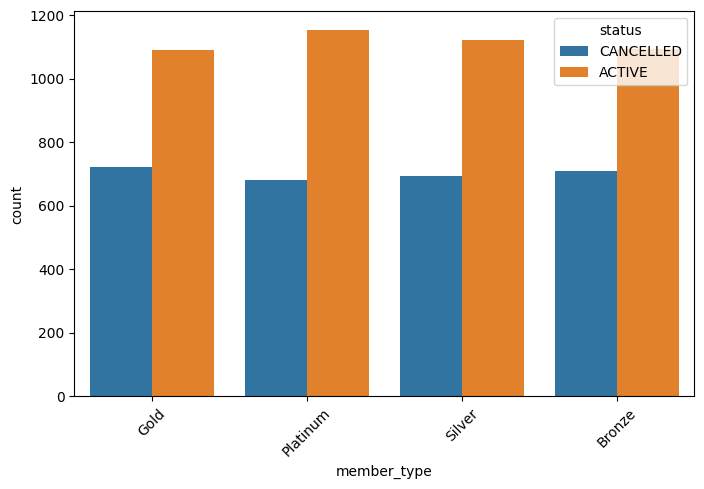

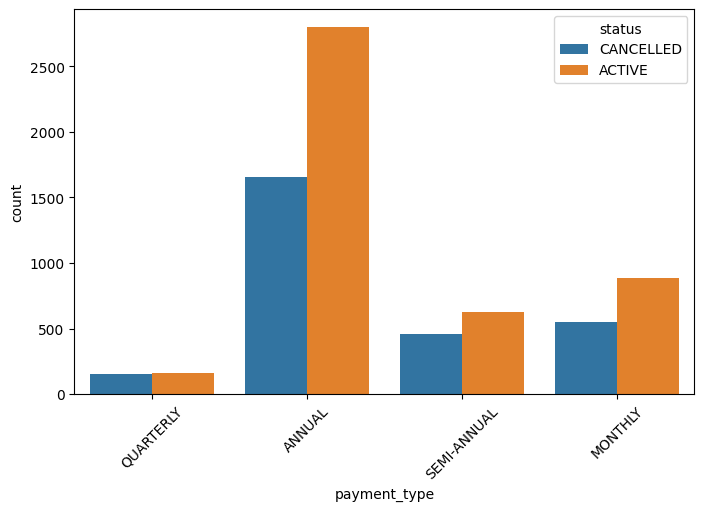

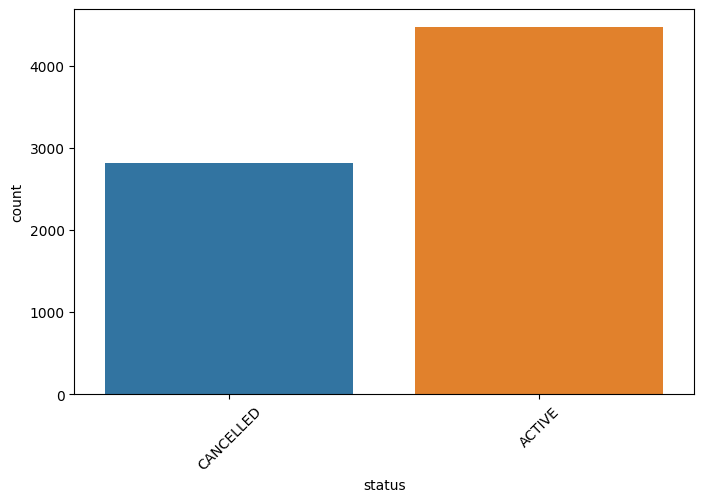

In [147]:
exclude_cols = ["last_name", "id"]

for col in df.columns[df.dtypes == "object"]:
    if col not in exclude_cols and df[col].notna().sum() > 0:  # Exclude specific columns
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue="status")
        plt.xticks(rotation=45)
        plt.show()
